<hr> Software packages network analysis
<br>- Code adapted from https://github.com/ConnectedSystems/sd-prac-bibanalysis/blob/master/notebooks/Bib%20Analysis.ipynb
<br> - Having difficulty running the code due to missing citation data.

<hr> Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

<hr> Keyword match software packages
<br> Wanted to use refined collection but didn't have necessary citation data.  Will use the whole RC instead.

In [50]:
software_packages = wosis.keyword_matches(RC, ['software', 'toolkit'], threshold=95.0)

In [51]:
software_rc = software_packages.combine_recs()

<hr>

<hr> Finding top cited software papers to facilitate network analysis

In [35]:
import networkx as nx

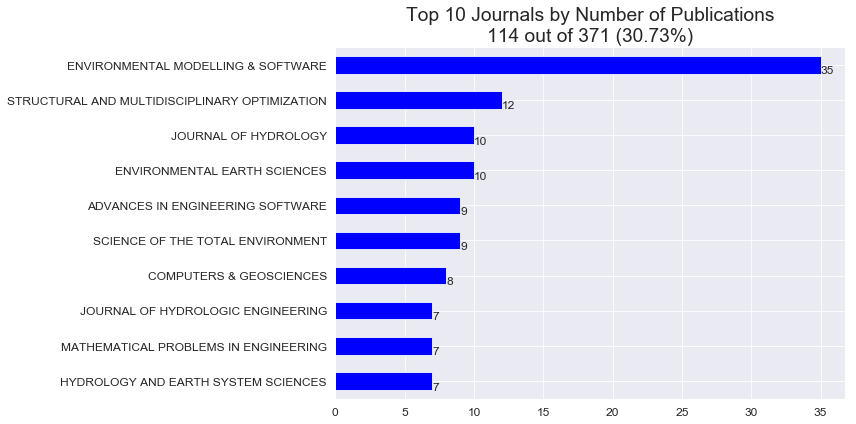

In [52]:
wos_plot.plot_pubs_per_journal(software_rc, annotate=True)

In [53]:
journals_of_interest_software = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Computers & Geosciences'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Advances in Engineering Software'.upper(), 'Environmental Earth Sciences'.upper(), 'Science of the Total Environment'.upper(), 'Journal of Hydrologic Engineering'.upper(), 'Mathematical Problems in Engineering'.upper(), 'Hydrology and Earth System Sciences'.upper()]
pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [55]:
data_dir = "tmp" 

# Get citations for each paper
paper_citations_per_journal_software = {}
for pubs in pubs_for_journals_software:
    paper_citations_per_journal_software[pubs] = wosis.get_num_citations(pubs_for_journals_software[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5E9OZB82xYbF3KhNlUI)



Authenticated (SID: 6FOCxpaeCz7982OpRvD)



Authenticated (SID: 5CUwZCpFD5XEJT1jUao)



Authenticated (SID: 8C7NCuapoBWP8AdtLN6)



Authenticated (SID: 6EYp6siz1eteMlsFNU4)
